In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("DoH Prediction.csv")

In [4]:
df.tail()

,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
499101,4865,144.950072,7622,227.093412,216676.627229,465.485367,231.240741,149.5,68,0.526810,...,1.916871,6.745692e-05,0.008213,0.009261,0.012254,0.000003,-1.093069,1.127264,0.886816,Malicious
499102,1807,53.007877,4895,143.593558,141408.773333,376.043579,223.400000,76.0,68,1.175928,...,1.629455,5.509494e-05,0.007423,0.010499,0.015296,0.000021,-1.938720,1.411665,0.706966,Malicious
499103,1738,51.137163,4761,140.082874,322424.727023,567.824557,240.703704,76.0,68,0.870183,...,1.515189,5.126219e-05,0.007160,0.012407,0.016293,0.000011,-1.628476,1.731273,0.577098,Malicious
499104,353,85.910364,393,95.645250,469.209877,21.661253,82.888889,66.0,66,2.339046,...,0.534526,2.246325e-09,0.000047,0.000051,0.000018,0.000017,2.089574,0.717636,0.921984,Benign
499105,4184,13011.997082,5406,16809.537255,13741.344067,117.222620,144.264302,105.0,66,1.004673,...,0.528666,9.335833e-05,0.009620,0.015714,0.019397,0.000018,-1.077359,1.618330,0.621961,Benign


In [5]:
df = df.replace({"Label" : {"Benign" : 0, "Malicious" : 1}})
df["Label"] = df["Label"].astype(int)

In [6]:
df.head()

,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,353,80.890348,393,90.056393,469.209877,21.661253,82.888889,66.0,66,2.339046,...,0.534524,1.754601e-09,0.000042,0.000048,0.000019,0.000017,2.028699,0.737490,0.869641,0
1,1807,53.056709,4828,141.758602,145520.370987,381.471324,228.793103,76.0,68,1.201609,...,1.591559,5.348911e-05,0.007314,0.011523,0.015273,0.000016,-1.538407,1.573304,0.634722,1
2,15000,479.536009,27719,886.150575,25949.480963,161.088426,135.186709,87.0,87,0.897396,...,0.670950,3.356292e-01,0.579335,0.139518,0.001976,0.000003,0.712241,0.240819,4.152404,1
3,1755,58.193065,4617,153.125406,154088.445853,392.541007,245.112953,75.5,54,1.296268,...,2.029971,1.245935e+02,11.162146,5.011613,0.015778,0.012884,1.342708,0.447829,2.227258,0
4,618,3.491495,315,1.779646,319.410000,17.872045,93.300000,105.0,105,-1.963961,...,0.816362,2.975575e-09,0.000054,0.015507,0.015471,0.015466,1.986391,0.751146,0.003502,0


In [7]:
df.describe()

,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
count,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,4.991060e+05,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,...,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000,499106.000000
mean,4.020093e+04,4.733915e+04,4.250156e+04,3.166829e+04,9.263585e+04,220.169083,173.159814,95.472702,70.749953,0.442934,...,0.972995,1.711825,0.319586,0.442021,0.394671,0.205894,-0.968984,-0.060800,1.114611,0.500000
std,1.439617e+05,4.212751e+05,1.393927e+05,2.566805e+05,1.534938e+05,210.141825,85.506490,32.999740,14.830277,1.551998,...,0.520212,11.106412,1.244031,2.071807,2.351233,1.724873,3.163775,3.198770,1.735820,0.500001
min,5.500000e+01,1.464903e+00,5.400000e+01,1.576245e+00,0.000000e+00,0.000000,56.000000,54.000000,54.000000,-10.000000,...,0.077182,0.000000,0.000000,0.000005,0.000002,-0.000001,-10.000000,-10.000000,0.000000,0.000000
25%,6.180000e+02,5.410781e+01,4.760000e+02,1.418128e+02,4.692099e+02,21.661253,92.000000,76.000000,66.000000,0.199848,...,0.577836,0.000021,0.004454,0.010538,0.012238,0.000016,-1.797168,0.393686,0.552687,0.000000
50%,1.807000e+03,3.640969e+02,4.827000e+03,4.611146e+02,1.826789e+04,135.142971,152.488283,87.000000,68.000000,0.986397,...,0.748184,0.000079,0.008820,0.015148,0.015407,0.000034,0.000000,0.908002,0.800649,0.500000
75%,5.542000e+03,3.810260e+03,7.888000e+03,4.215498e+03,1.415989e+05,376.296309,228.758621,105.000000,68.000000,1.201609,...,1.516263,0.000357,0.018640,0.024903,0.016300,0.015161,0.936908,1.305393,1.208105,1.000000
max,8.015359e+06,2.304348e+07,7.723184e+06,7.600000e+06,1.578115e+06,1256.230616,689.800000,317.000000,553.000000,2.932375,...,5.616085,647.245330,25.441017,28.017596,28.017596,28.017596,2.970716,5.428781,66.309747,1.000000


In [8]:
cols_stze = ["FlowBytesSent", 'FlowSentRate', 'FlowBytesReceived', 'FlowReceivedRate', 'PacketLengthVariance', 'PacketLengthStandardDeviation', 'PacketLengthMean', 'PacketLengthMedian', 'PacketLengthMode', 'PacketLengthSkewFromMedian', 'PacketLengthSkewFromMode', 'PacketTimeVariance', 'PacketTimeStandardDeviation', 'PacketTimeMean', 'PacketTimeMedian', 'PacketTimeMode', 'PacketTimeSkewFromMode', 'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMean', 'ResponseTimeTimeMedian', 'ResponseTimeTimeMode','ResponseTimeTimeSkewFromMedian', 'ResponseTimeTimeSkewFromMode', 'ResponseTimeTimeCoefficientofVariation']
df[cols_stze] = (df[cols_stze] - df[cols_stze].mean())/df[cols_stze].std()

df.head()

,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
0,-0.276795,-0.112179,-0.302086,-0.123025,-0.600459,-0.944637,-1.055720,-0.893119,-0.320288,1.221723,...,0.534524,-0.154129,-0.256862,-0.213327,-0.167849,-0.119358,0.947502,0.249561,-0.141126,0
1,-0.266695,-0.112245,-0.270269,-0.122824,0.344539,0.767588,0.650632,-0.590087,-0.185428,0.488837,...,1.591559,-0.154125,-0.251017,-0.207789,-0.161361,-0.119358,-0.179982,0.510854,-0.276462,1
2,-0.175053,-0.111233,-0.106050,-0.119924,-0.434457,-0.281147,-0.444096,-0.256751,1.095735,0.292824,...,0.670950,-0.123910,0.208796,-0.146009,-0.167017,-0.119366,0.531398,0.094292,1.750062,1
3,-0.267057,-0.112233,-0.271783,-0.122780,0.400359,0.820265,0.841493,-0.605238,-1.129443,0.549829,...,2.029971,11.064030,8.715670,2.205608,-0.161147,-0.111898,0.730675,0.159008,0.640992,0
4,-0.274955,-0.112363,-0.302645,-0.123369,-0.601434,-0.962669,-0.933962,0.288708,2.309468,-1.550836,...,0.816362,-0.154129,-0.256852,-0.205866,-0.161277,-0.110401,0.934129,0.253831,-0.640105,0


In [9]:
df.corr()

,FlowBytesSent,FlowSentRate,FlowBytesReceived,FlowReceivedRate,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMedian,PacketLengthMode,PacketLengthSkewFromMedian,...,PacketTimeCoefficientofVariation,ResponseTimeTimeVariance,ResponseTimeTimeStandardDeviation,ResponseTimeTimeMean,ResponseTimeTimeMedian,ResponseTimeTimeMode,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,ResponseTimeTimeCoefficientofVariation,Label
FlowBytesSent,1.000000,-0.027537,0.815642,-0.029200,-0.125260,-0.121286,-0.038375,0.282036,-0.038400,0.042441,...,-0.202211,-0.040391,-0.055171,-0.054637,-0.045478,-0.032371,0.126485,0.037997,0.440981,0.208736
FlowSentRate,-0.027537,1.000000,-0.030958,0.994330,-0.063464,-0.100646,-0.112469,-0.044428,-0.066774,-0.028486,...,-0.000057,-0.017295,-0.028733,-0.023904,-0.018816,-0.013394,-0.300554,-0.326855,-0.067198,-0.108724
FlowBytesReceived,0.815642,-0.030958,1.000000,-0.031073,-0.123848,-0.114174,-0.012396,0.370265,-0.036229,0.037382,...,-0.208003,-0.043357,-0.063058,-0.060469,-0.049238,-0.034960,0.110233,0.045015,0.259427,0.209764
FlowReceivedRate,-0.029200,0.994330,-0.031073,1.000000,-0.049494,-0.089524,-0.099818,-0.046553,-0.068310,-0.023304,...,-0.008451,-0.018952,-0.031398,-0.026166,-0.020591,-0.014698,-0.298879,-0.322588,-0.068752,-0.112189
PacketLengthVariance,-0.125260,-0.063464,-0.123848,-0.049494,1.000000,0.915403,0.845969,-0.216173,-0.164969,0.271415,...,0.279322,-0.019242,-0.047781,-0.096472,-0.096820,-0.071382,0.064658,0.231762,-0.044358,0.281564
PacketLengthStandardDeviation,-0.121286,-0.100646,-0.114174,-0.089524,0.915403,1.000000,0.939291,-0.179838,-0.265381,0.415582,...,0.439985,-0.023060,-0.074818,-0.164639,-0.163849,-0.122509,0.143830,0.349109,-0.002290,0.442103
PacketLengthMean,-0.038375,-0.112469,-0.012396,-0.099818,0.845969,0.939291,1.000000,0.022232,-0.254979,0.430143,...,0.352104,-0.037748,-0.097487,-0.203821,-0.200964,-0.150970,0.195822,0.359610,0.040978,0.415872
PacketLengthMedian,0.282036,-0.044428,0.370265,-0.046553,-0.216173,-0.179838,0.022232,1.000000,0.148676,-0.169817,...,-0.166792,-0.075071,-0.087071,-0.156990,-0.149564,-0.111617,0.140681,0.002990,0.168839,0.047670
PacketLengthMode,-0.038400,-0.066774,-0.036229,-0.068310,-0.164969,-0.265381,-0.254979,0.148676,1.000000,-0.525916,...,-0.101416,-0.083578,-0.086803,-0.089638,-0.071645,-0.063864,-0.196590,-0.246000,-0.127209,-0.218666
PacketLengthSkewFromMedian,0.042441,-0.028486,0.037382,-0.023304,0.271415,0.415582,0.430143,-0.169817,-0.525916,1.000000,...,0.156318,0.053003,0.055396,-0.277925,-0.242724,-0.366302,0.273067,0.336987,0.166317,0.182852


<Axes: >

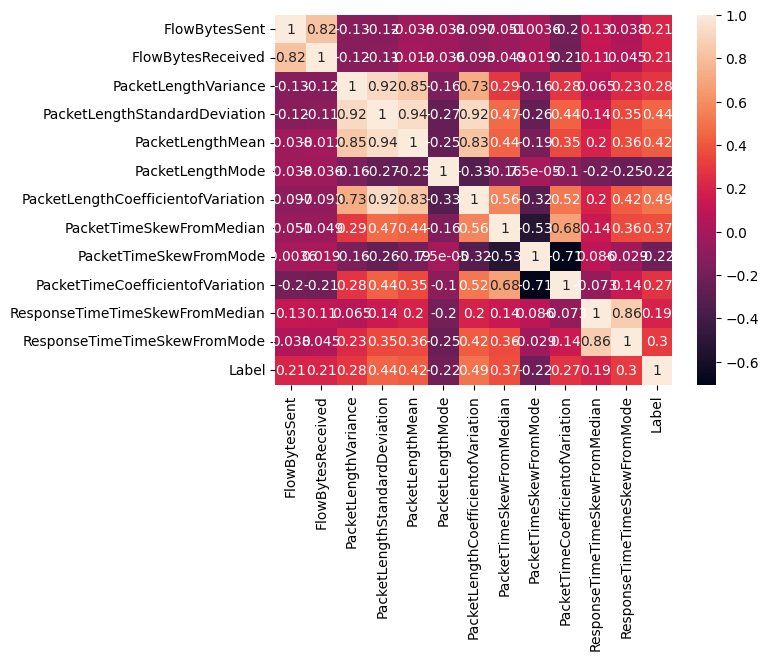

In [44]:
sb.heatmap(df.corr(), annot=True)

In [14]:
df.drop(['FlowSentRate', 'FlowReceivedRate', 'PacketLengthMedian', 'PacketLengthSkewFromMedian', 'PacketLengthSkewFromMode', 'PacketTimeVariance', 'PacketTimeStandardDeviation', 'PacketTimeMean', 'PacketTimeMedian', 'PacketTimeMode', 'ResponseTimeTimeVariance', 'ResponseTimeTimeStandardDeviation', 'ResponseTimeTimeMedian', 'ResponseTimeTimeMean', 'ResponseTimeTimeMode', 'ResponseTimeTimeCoefficientofVariation'], axis=1, inplace=True)

In [15]:
df.corr()

,FlowBytesSent,FlowBytesReceived,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMode,PacketLengthCoefficientofVariation,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,Label
FlowBytesSent,1.000000,0.815642,-0.125260,-0.121286,-0.038375,-0.038400,-0.097145,-0.051475,-0.003568,-0.202211,0.126485,0.037997,0.208736
FlowBytesReceived,0.815642,1.000000,-0.123848,-0.114174,-0.012396,-0.036229,-0.092525,-0.049239,0.019390,-0.208003,0.110233,0.045015,0.209764
PacketLengthVariance,-0.125260,-0.123848,1.000000,0.915403,0.845969,-0.164969,0.726080,0.287968,-0.163580,0.279322,0.064658,0.231762,0.281564
PacketLengthStandardDeviation,-0.121286,-0.114174,0.915403,1.000000,0.939291,-0.265381,0.924864,0.471053,-0.263729,0.439985,0.143830,0.349109,0.442103
PacketLengthMean,-0.038375,-0.012396,0.845969,0.939291,1.000000,-0.254979,0.825121,0.435118,-0.185222,0.352104,0.195822,0.359610,0.415872
PacketLengthMode,-0.038400,-0.036229,-0.164969,-0.265381,-0.254979,1.000000,-0.328610,-0.156680,0.000075,-0.101416,-0.196590,-0.246000,-0.218666
PacketLengthCoefficientofVariation,-0.097145,-0.092525,0.726080,0.924864,0.825121,-0.328610,1.000000,0.564319,-0.320761,0.515173,0.195882,0.417589,0.494159
PacketTimeSkewFromMedian,-0.051475,-0.049239,0.287968,0.471053,0.435118,-0.156680,0.564319,1.000000,-0.531769,0.675213,0.139967,0.359357,0.368499
PacketTimeSkewFromMode,-0.003568,0.019390,-0.163580,-0.263729,-0.185222,0.000075,-0.320761,-0.531769,1.000000,-0.706134,0.086032,-0.029278,-0.220702
PacketTimeCoefficientofVariation,-0.202211,-0.208003,0.279322,0.439985,0.352104,-0.101416,0.515173,0.675213,-0.706134,1.000000,-0.072850,0.141459,0.271546


In [16]:
x = df.iloc[:, :-1]
x.head()

,FlowBytesSent,FlowBytesReceived,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMode,PacketLengthCoefficientofVariation,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode
0,-0.276795,-0.302086,-0.600459,-0.944637,-1.055720,-0.320288,0.261329,-1.598735,0.875271,0.534524,0.947502,0.249561
1,-0.266695,-0.270269,0.344539,0.767588,0.650632,-0.185428,1.667320,1.868296,-0.865418,1.591559,-0.179982,0.510854
2,-0.175053,-0.106050,-0.434457,-0.281147,-0.444096,1.095735,1.191600,0.729436,0.342354,0.670950,0.531398,0.094292
3,-0.267057,-0.271783,0.400359,0.820265,0.841493,-1.129443,1.601499,1.463037,-1.060863,2.029971,0.730675,0.159008
4,-0.274955,-0.302645,-0.601434,-0.962669,-0.933962,2.309468,0.191555,0.612072,-0.029567,0.816362,0.934129,0.253831


In [17]:
y = df.iloc[:, -1]
y.head()

,Label
0,0
1,1
2,1
3,0
4,0


In [18]:
trainx, testx, trainy, testy = train_test_split(x, y, test_size = 0.1, random_state = 50)

In [19]:
testy.head()

,Label
32065,1
120834,0
495048,0
46902,1
143308,1


In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
from sklearn.naive_bayes import GaussianNB

In [27]:
model = RandomForestClassifier()

In [28]:
model.fit(trainx, trainy)

RandomForestClassifier()

In [29]:
model.score(testx, testy)

0.9995191440764561

*   DTC (Took 15 seconds) = 99.883793
*   RF (Took 3 minutes 50 seconds) = 99.951914
*   GaussNB (Took 2 seconds) = Same as RF

In [30]:
modelGNB = GaussianNB()

In [31]:
modelGNB.fit(trainx, trainy)

GaussianNB()

In [32]:
model.score(testx, testy)

0.9995191440764561

In [33]:
df.count()

,0
FlowBytesSent,499106
FlowBytesReceived,499106
PacketLengthVariance,499106
PacketLengthStandardDeviation,499106
PacketLengthMean,499106
PacketLengthMode,499106
PacketLengthCoefficientofVariation,499106
PacketTimeSkewFromMedian,499106
PacketTimeSkewFromMode,499106
PacketTimeCoefficientofVariation,499106


In [34]:
import joblib

In [37]:
joblib.dump(model, 'RF_DOH_model.pkl')

['RF_DOH_model.pkl']

In [39]:
df.head()

,FlowBytesSent,FlowBytesReceived,PacketLengthVariance,PacketLengthStandardDeviation,PacketLengthMean,PacketLengthMode,PacketLengthCoefficientofVariation,PacketTimeSkewFromMedian,PacketTimeSkewFromMode,PacketTimeCoefficientofVariation,ResponseTimeTimeSkewFromMedian,ResponseTimeTimeSkewFromMode,Label
0,-0.276795,-0.302086,-0.600459,-0.944637,-1.055720,-0.320288,0.261329,-1.598735,0.875271,0.534524,0.947502,0.249561,0
1,-0.266695,-0.270269,0.344539,0.767588,0.650632,-0.185428,1.667320,1.868296,-0.865418,1.591559,-0.179982,0.510854,1
2,-0.175053,-0.106050,-0.434457,-0.281147,-0.444096,1.095735,1.191600,0.729436,0.342354,0.670950,0.531398,0.094292,1
3,-0.267057,-0.271783,0.400359,0.820265,0.841493,-1.129443,1.601499,1.463037,-1.060863,2.029971,0.730675,0.159008,0
4,-0.274955,-0.302645,-0.601434,-0.962669,-0.933962,2.309468,0.191555,0.612072,-0.029567,0.816362,0.934129,0.253831,0


In [43]:
model.predict([[-0.276, -0.302, -0.600, -0.944, -1.055, -0.320, 0.261, -1.598, 0.875, 0.534, 0.947, 0.259]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0])